
# Lecture 0: Install and Work with R 

## Introduction


**TA: Davide Viviano**: 

- Email: dviviano@ucsd.edu
- Website: dviviano.github.io
- Please reach out whenever you need any help. I should reply within 24 hours to your emails. 
- Background: PhD student in Economics. Before I received a master in Data Science. 
- Research: causal inference, network analysis, machine learning.  


**Intended Learning Outcomes:**

1. Develop an appreciation for what is involved in learning from data. 

2. Understand a wide variety of learning algorithms. 

3. Understand how to apply a variety of learning algorithms to data . 

4. Understand how to perform evaluation of learning algorithms and model selection. 

5. *Improve computer programming skills*.



**References**: 



- An introduction to statistical learning  Friedman, Jerome, Trevor Hastie, and Robert Tibshirani. (Available free PDF on-line) -> good reference also for programming 

optional: 

- The elements of statistical learning, Friedman, Jerome, Trevor Hastie, and Robert Tibshirani.  Springer, Berlin: Springer series in statistics, 2001. (Available free PDF on-line)



## But you will need Data and a powerful program


<img src="./image/programs.png" width="700" height="300" alt="This is alternate text">


**About R**

Pros:

- Open Source
- Object oriented language
- Widely used by statistical communities
-  Flexible, rich of packages and built-in functions

 <br />
 
 Cons: Lower efficiency then other languages (ex: C, Julia). 




## Learning Curve

<br />


<img src="./image/curve.png" width="700" height="300" alt="This is alternate text">

## Today Lecture

- Introduction to R: 
   - Object oriented language: how to write vectors and matrices 
   - how to open a data set
   - basic work with data 
   

## Install R and Rstudio 

**Instructions**

https://courses.edx.org/courses/UTAustinX/UT.7.01x/3T2014/56c5437b88fa43cf828bff5371c6a924/

## Basic Programming 

- Many functions come along external packages. How should we install packages? 

Two main repositories: CRAN (https://cran.r-project.org/mirrors.html) and github (https://github.com/)



In [1]:
## install package devtools : installation from CRAN
install.packages('devtools')
## open the package in the current library 
library(devtools)
## call a function from the package
# install_github(): to install packages from github

Installing package into ‘/home/davide/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
also installing the dependencies ‘ini’, ‘processx’, ‘clipr’, ‘clisymbols’, ‘fs’, ‘gh’, ‘rex’, ‘callr’, ‘cli’, ‘xopen’, ‘brew’, ‘commonmark’, ‘purrr’, ‘praise’, ‘rlang’, ‘usethis’, ‘covr’, ‘DT’, ‘ellipsis’, ‘pkgbuild’, ‘pkgload’, ‘rcmdcheck’, ‘roxygen2’, ‘rversions’, ‘sessioninfo’, ‘testthat’

Loading required package: usethis


In [4]:
## Define a vector 
my_first_vector <- c(1,2,3)
print(my_first_vector)

[1] 1 2 3


In [5]:
## Define a vector with repeated elements 
my_second_vector <- rep(1, 10)
print(my_second_vector)

 [1] 1 1 1 1 1 1 1 1 1 1


In [6]:
## Combine the two vectors 
my_third_vector <- c(my_second_vector, my_first_vector)
print(my_third_vector)

 [1] 1 1 1 1 1 1 1 1 1 1 1 2 3


In [24]:
## Square the vector
print(my_third_vector**2)

 [1] 1 1 1 1 1 1 1 1 1 1 1 4 9


In [7]:
## Define a matrix

A <- matrix(c(1:9), nrow = 3, ncol = 3)
print(my_first_matrix)

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9


In [8]:
B <- matrix(c(1:6), nrow = 3, ncol = 2 )
print(my_second_matrix)

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6


- Matrix Multiplication: 
$C = B^\top A$

In [9]:
## Matrix multiplication 
t(B)%*%A

14,32,50
32,77,122


In [10]:
## Fill a matrix with missing values
C <- matrix(NA, nrow = 2, ncol = 2)
C

NA,NA
NA,NA


## Open Data Sets

In [14]:
### Download data folder  
## Open the forestfirest file 
forest.fires <- read.csv("./data/forestfires.csv")


In [12]:
## Look at the dimension 
dim(forest.fires)

[1] 517  13

In [13]:
## look at names of the variables
names(forest.fires)

[1] "X"     "Y"     "month" "day"   "FFMC"  "DMC"   "DC"    "ISI"   "temp" 
[10] "RH"    "wind"  "rain"  "area"

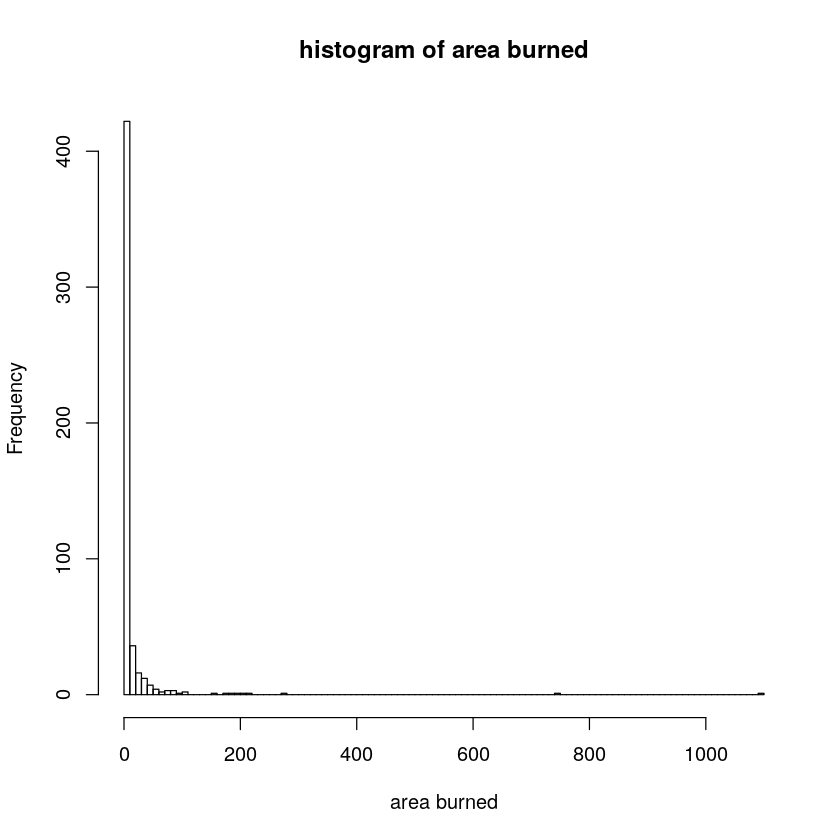

In [17]:
## Look at the area variable
y <- forest.fires$area
## Do an histogram
hist(y, breaks=100, main="histogram of area burned", xlab="area burned")

In [18]:
## Run a linear regression 

reg1 <- lm(area ~ temp, data=forest.fires)
summary(reg1)


Call:
lm(formula = area ~ temp, data = forest.fires)

Residuals:
    Min      1Q  Median      3Q     Max 
 -27.34  -14.68  -10.39   -3.42 1071.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -7.4138     9.4996  -0.780   0.4355  
temp          1.0726     0.4808   2.231   0.0261 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 63.41 on 515 degrees of freedom
Multiple R-squared:  0.009573,	Adjusted R-squared:  0.00765 
F-statistic: 4.978 on 1 and 515 DF,  p-value: 0.0261


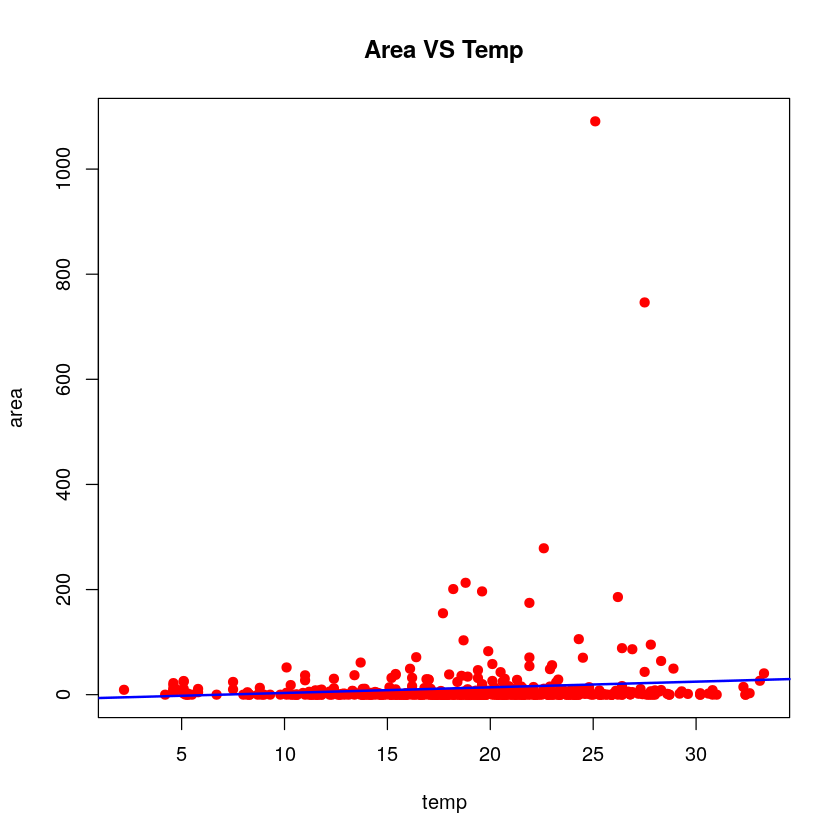

In [19]:
## Plot the regression
plot(area ~ temp, data=forest.fires, col="red", pch=19, cex=1, main="Area VS Temp")
abline(reg1, col="blue", lwd=2)

In [23]:
## Predictions 
predictions <- predict(reg1, newdata = forest.fires)
## Compute prediction error 
MSE <- mean((forest.fires$area - predictions)**2)
print(MSE)

[1] 4005.508


### Exercise 

- Run a regression by Including also the variables: temp, wind , rain , day , month
- Report the coefficients 
- Report the prediction error 

### Challenging Exercise

- Consider the previous regression: do you observe ``outliers''? 
- Remove the outliers and run a new regression. What are now the coefficients? 
